<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h5>K-means, K-Medoids</b></center>
<pre>    

# Name : Krish V. Gohel
### EnrNo : 22010101060
### RollNO : 188

# Step 1: Import Libraries

In [76]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [77]:
dt = pd.read_csv("StudentsPerformance.csv")

In [78]:
dt

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72             74  
1                 completed          69             90             88  
2                      none          90             95             93  
3                      none          47             57             44  
4                      none          76             78             75  
..                      ...         ...            ...            ...  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  

[1000 rows x 8 columns]

# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [79]:
dt.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

# Step 4: Display PairPlot

C:\Users\Krish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


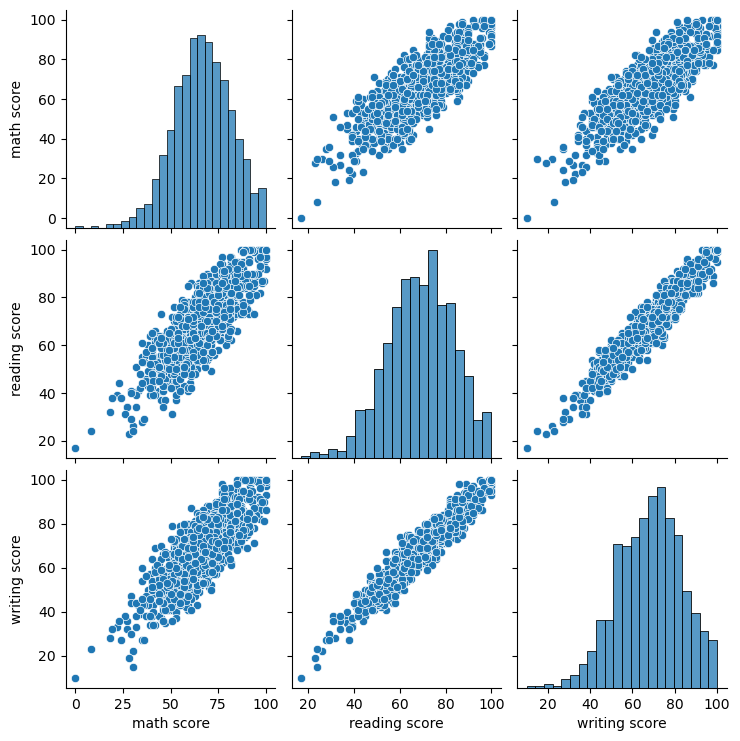

In [80]:
sns.pairplot(dt)

# Step 5: Correlation heatmap

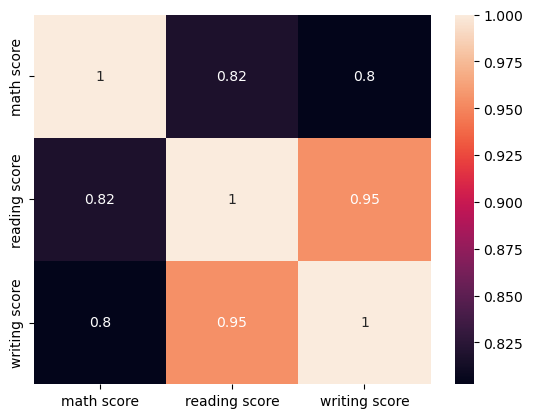

In [81]:
sns.heatmap(dt[['math score','reading score','writing score']].corr(),annot=True)
plt.show()

# Step 6: Distribution of numerical features

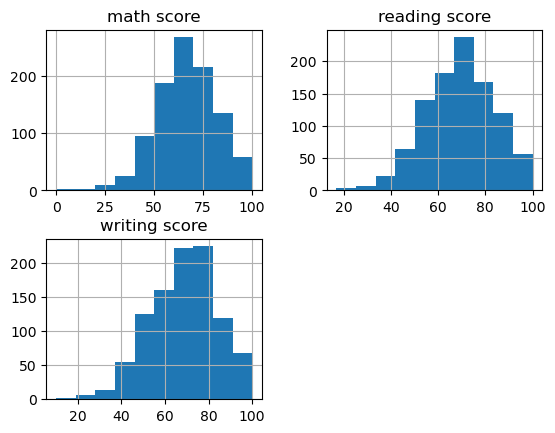

In [82]:
dt.hist()
plt.show()

# Step 7: Apply StandardScaler

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
ss = StandardScaler()

In [85]:
x = dt[['math score','reading score','writing score']]

In [86]:
x_transform = ss.fit_transform(x)

# Step 8: Elbow method to find optimal k

In [87]:
d = []
for k in range(1,11):
    model = KMeans(n_clusters=k,random_state=42)
    model.fit(x_transform)
    d.append(model.inertia_)

C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

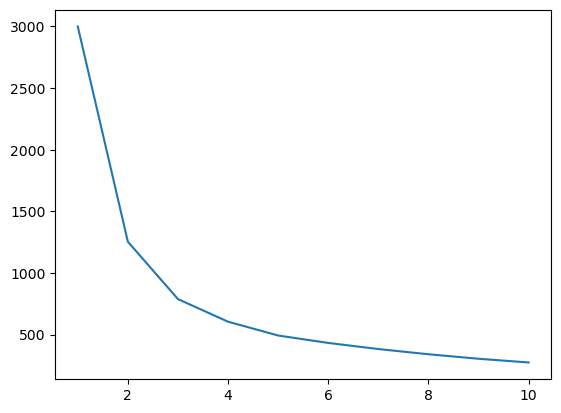

In [88]:
plt.plot(range(1,11),d)

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [89]:
from sklearn.cluster import KMeans

In [90]:
model = KMeans(n_clusters=3,random_state=42)

In [91]:
model.fit(x_transform)

C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

# Step 10: Print Cluster Center

In [92]:
model.cluster_centers_

array([[-0.04951336, -0.04870596, -0.01529686],
       [-1.18720058, -1.26762535, -1.28838441],
       [ 1.03099793,  1.09485536,  1.06358515]])

In [93]:
dt['kmeans'] = model.labels_

In [94]:
dt['kmeans'].value_counts()

kmeans
0    443
2    308
1    249
Name: count, dtype: int64

# Step 11: Plot Cluster

<Axes: xlabel='reading score', ylabel='writing score'>

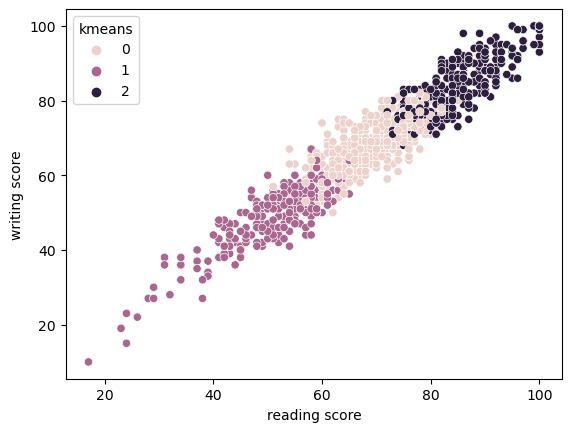

In [95]:
sns.scatterplot(dt,x=dt['reading score'],y=dt['writing score'],hue=dt['kmeans'])

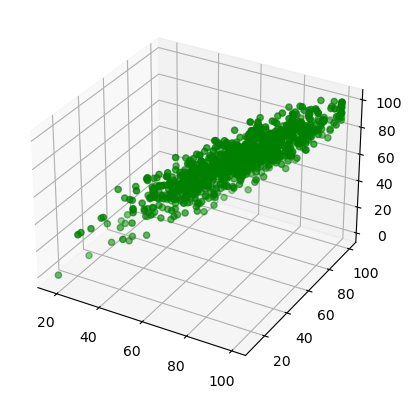

In [96]:
ax = plt.axes(projection ="3d")
ax.scatter3D(dt['reading score'],dt['writing score'], dt['math score'], color = "green")
plt.show()

# Step 12:Analyze clusters 

In [97]:
dt['total'] = dt['reading score'] + dt['math score'] + dt['writing score']

In [98]:
gb = dt.groupby('kmeans')

In [99]:
for k,cluster_data in gb:
    print(k,cluster_data['total'].min(),cluster_data['total'].max())
    print('----')

0 175 226
----
1 27 175
----
2 226 300
----


In [103]:
dt[dt['kmeans']== 1]

gender race/ethnicity parental level of education         lunch  \
3      male        group A          associate's degree  free/reduced   
7      male        group B                some college  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
980  female        group B                 high school  free/reduced   
985    male        group A                 high school      standard   
986  female        group C          associate's degree      standard   
988  female        group A            some high school  free/reduced   
996    male        group C                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  kmeans  \
3                      none          47             57             44       1   
7                      none          40             43             39       1   
9                      none          38             60             50       1   
10                     none          58             54             52       1   
11                     none          40             52             43       1   
..                      ...         ...            ...            ...     ...   
980                    none           8             24             23       1   
985                    none          57             51             54       1   
986                    none          40             59             51       1   
988                    none          44             45             45       1   
996                    none          62             55             55       1   

     total  
3      148  
7      122  
9      148  
10     164  
11     135  
..     ...  
980     55  
985    162  
986    150  
988    134  
996    172  

[249 rows x 10 columns]

# Step 13: Perform K-Medoids

In [104]:
from sklearn_extra.cluster import KMedoids

In [ ]:
pip install scikit-learn-extra

# Step:14 Comparison of K-means and K-medoids Clusters

# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]